<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/Employee_Salary_Prediction_Datase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Employee Salary Prediction Dataset
#Source: https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer
#Objective: Understand salary determinants based on experience and qualifications.

#Step 1: Setup and Data Preparation
#1. Load the Dataset

import pandas as pd

# Load the dataset
data = pd.read_csv("Salary Data.csv")

# Display first 5 rows
print(data.head())

# Display last 5 rows
print(data.tail())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
      Age  Gender Education Level                      Job Title  \
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
370                

In [3]:
#2. Understand the Structure
# Check structure
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None
              Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max   

In [4]:
#3. Handle Missing Values
#If there are missing values:

# Fill missing values with mean (for numerical) or mode (for categorical)
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical columns
        data[column] = data[column].fillna(data[column].mode()[0])
    else:  # Numerical columns
        data[column] = data[column].fillna(data[column].mean())

In [9]:
#4. Encode Categorical Variables
#Convert categorical variables into numeric form using one-hot encoding or label encoding.

#One-Hot Encoding :

import pandas as pd

# Load the dataset
data = pd.read_csv("Salary Data.csv")

# Verify column names
print("Column names in the dataset:")
print(data.columns)

data = data.rename(columns={
    'Education Level': 'education_level',
    'Job Title': 'job_title',
    'Gender': 'gender'
})

# Perform one-hot encoding for categorical variables
categorical_columns = ['education_level', 'job_title', 'gender']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display updated dataset
print("\nEncoded dataset:")
print(data_encoded.head())

# Optional: Save the encoded dataset to a new CSV file
data_encoded.to_csv("encoded_salary_data.csv", index=False)

Column names in the dataset:
Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

Encoded dataset:
    Age  Years of Experience    Salary  education_level_Master's  \
0  32.0                  5.0   90000.0                     False   
1  28.0                  3.0   65000.0                      True   
2  45.0                 15.0  150000.0                     False   
3  36.0                  7.0   60000.0                     False   
4  52.0                 20.0  200000.0                      True   

   education_level_PhD  job_title_Accountant  \
0                False                 False   
1                False                 False   
2                 True                 False   
3                False                 False   
4                False                 False   

   job_title_Administrative Assistant  job_title_Business Analyst  \
0                               False                       False  

In [22]:
#Label Encoding :
#For ordinal categorical variables:

from sklearn.preprocessing import LabelEncoder

# Apply label encoding to ordinal categorical columns
label_encoder = LabelEncoder()
data['education_level'] = label_encoder.fit_transform(data['education_level'])
data['job_title'] = label_encoder.fit_transform(data['job_title'])
data['gender'] = label_encoder.fit_transform(data['gender'])

# Display updated dataset
print(data.head())

    Age  gender  education_level  job_title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  200000.0


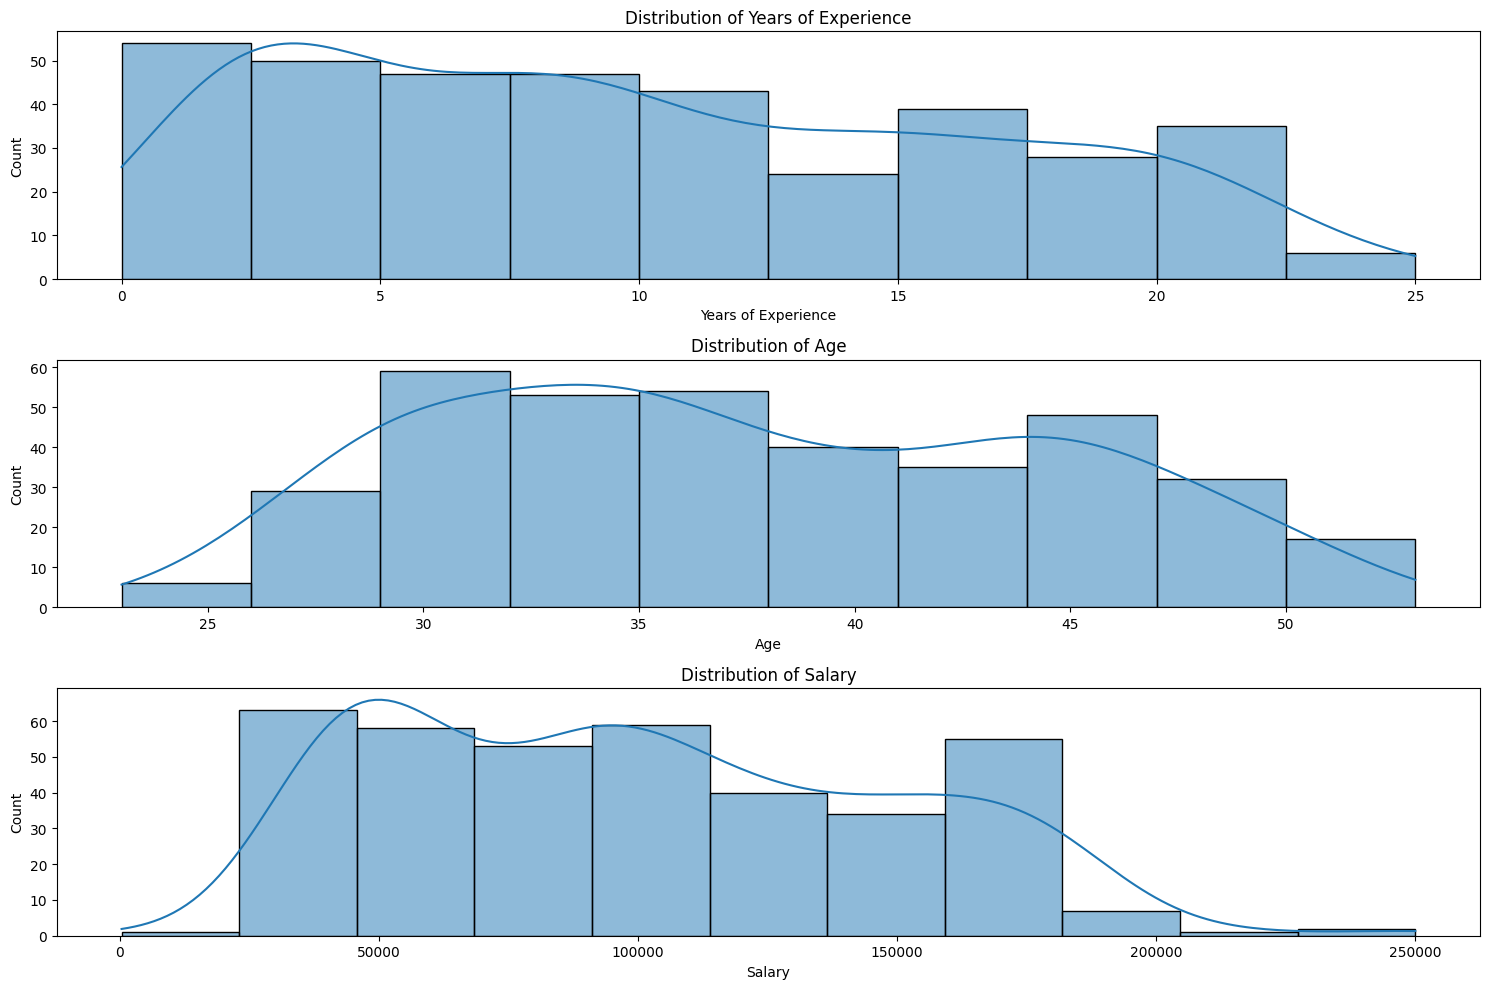

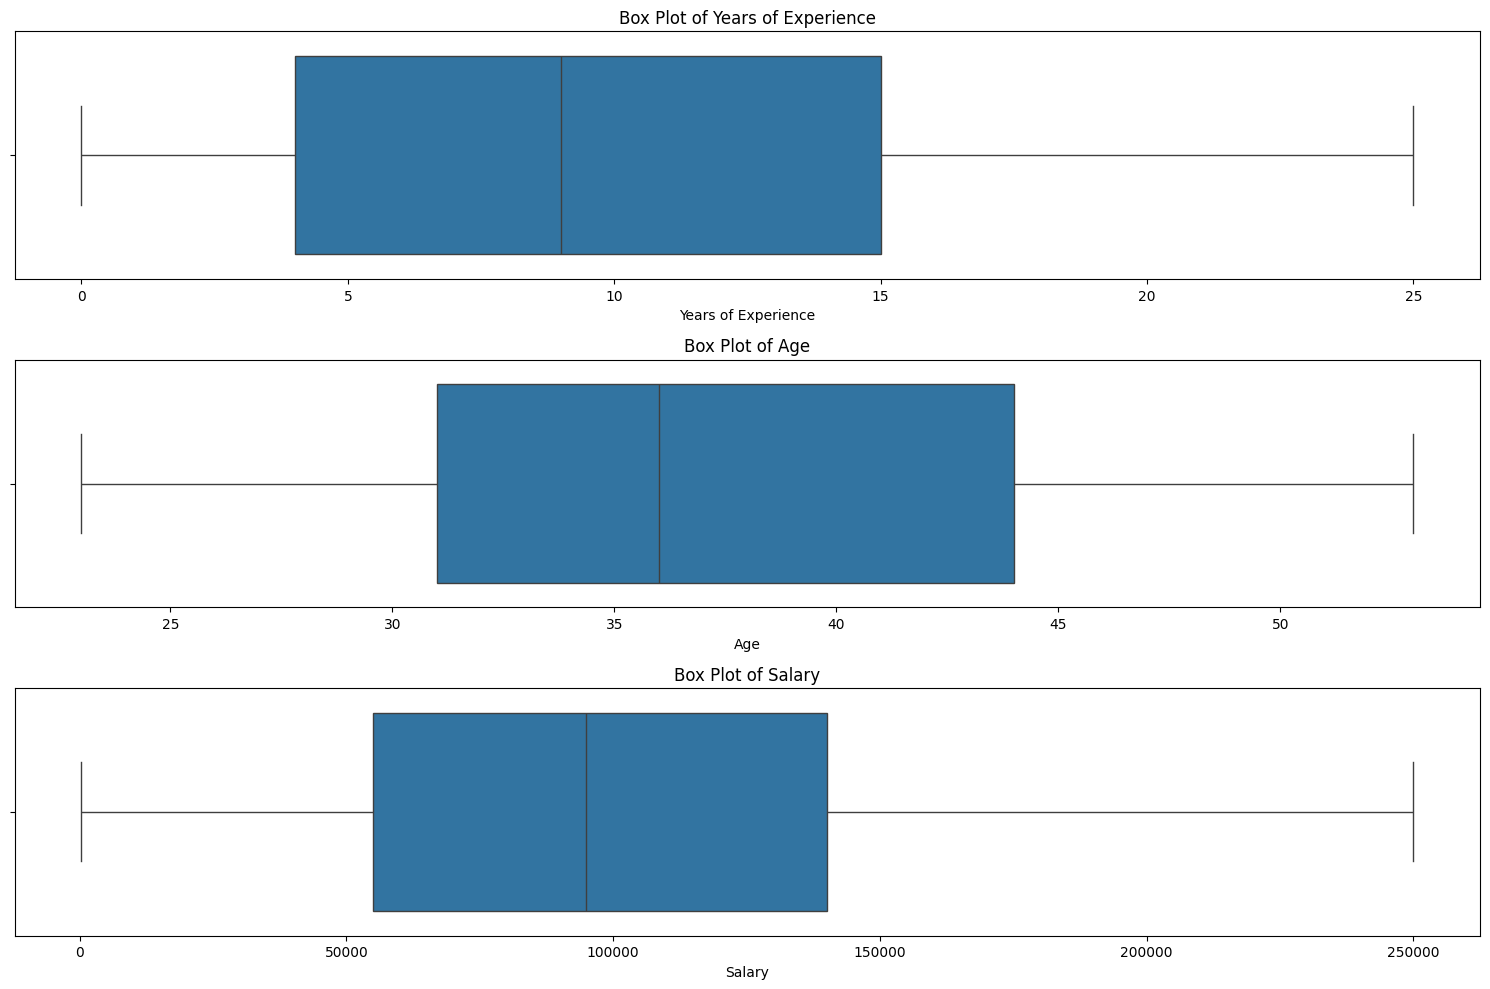

In [25]:
#Step 2: Exploratory Data Analysis (EDA)
#1. Univariate Analysis
#Analyze the distribution of individual variables.

#Numerical Columns :

import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Years of Experience', 'Age', 'Salary']):
    plt.subplot(3, 1, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Years of Experience', 'Age', 'Salary']):
    plt.subplot(3, 1, i+1)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

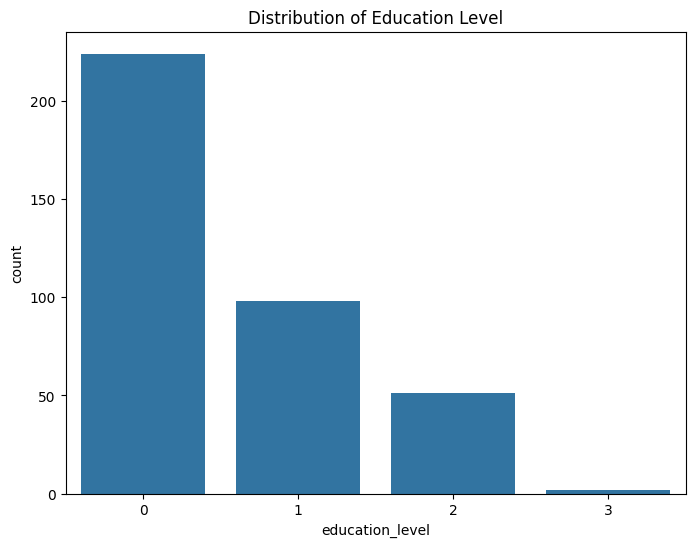

In [28]:
#Categorical Columns :
# Bar plot for EducationLevel
plt.figure(figsize=(8, 6))
sns.countplot(x='education_level', data=data)
plt.title('Distribution of Education Level')
plt.show()


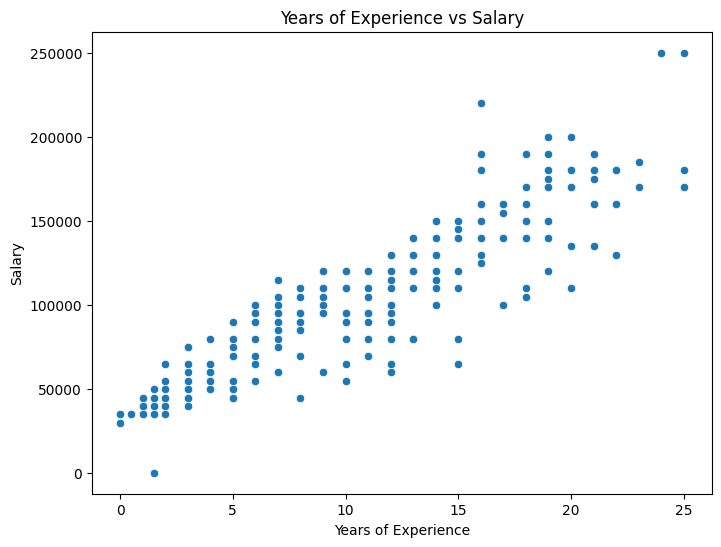

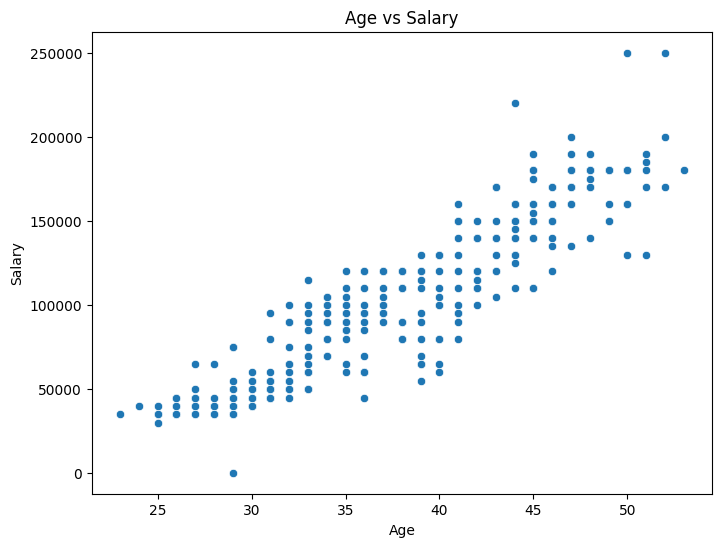

In [30]:
#2. Bivariate Analysis
#Analyze relationships between two variables.

#Scatter Plots :

# Scatter plot: YearsExperience vs Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Years of Experience', y='Salary', data=data)
plt.title('Years of Experience vs Salary')
plt.show()

# Scatter plot: Age vs Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=data)
plt.title('Age vs Salary')
plt.show()


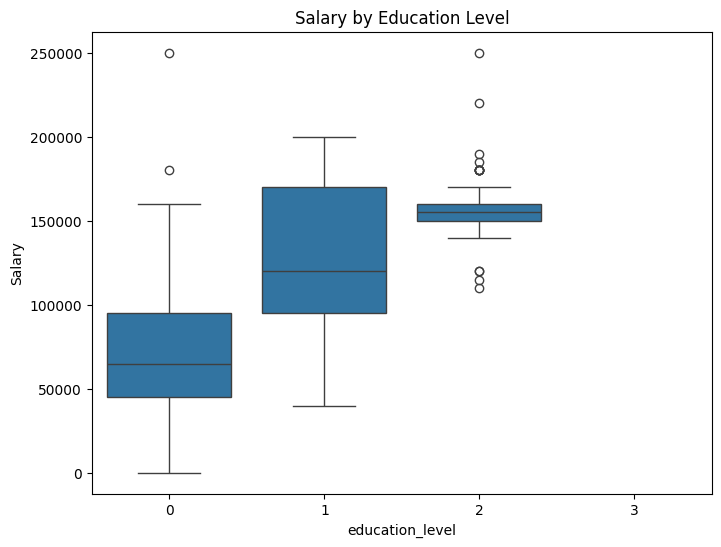

In [33]:
#Box Plots :
# Box plot: EducationLevel vs Salary
plt.figure(figsize=(8, 6))
sns.boxplot(x='education_level', y='Salary', data=data)
plt.title('Salary by Education Level')
plt.show()

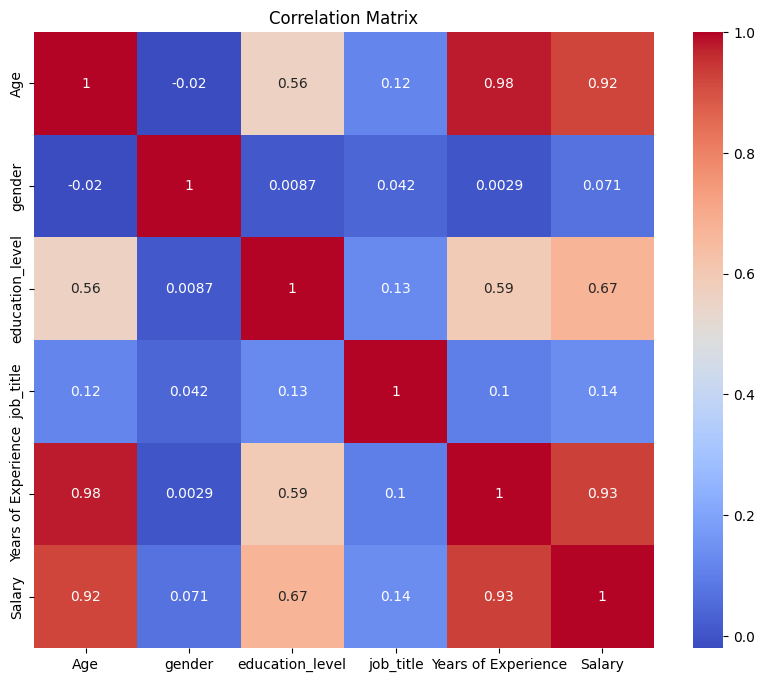

In [34]:
#3. Multivariate Analysis
#Analyze relationships between multiple variables.

#Correlation Matrix :

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

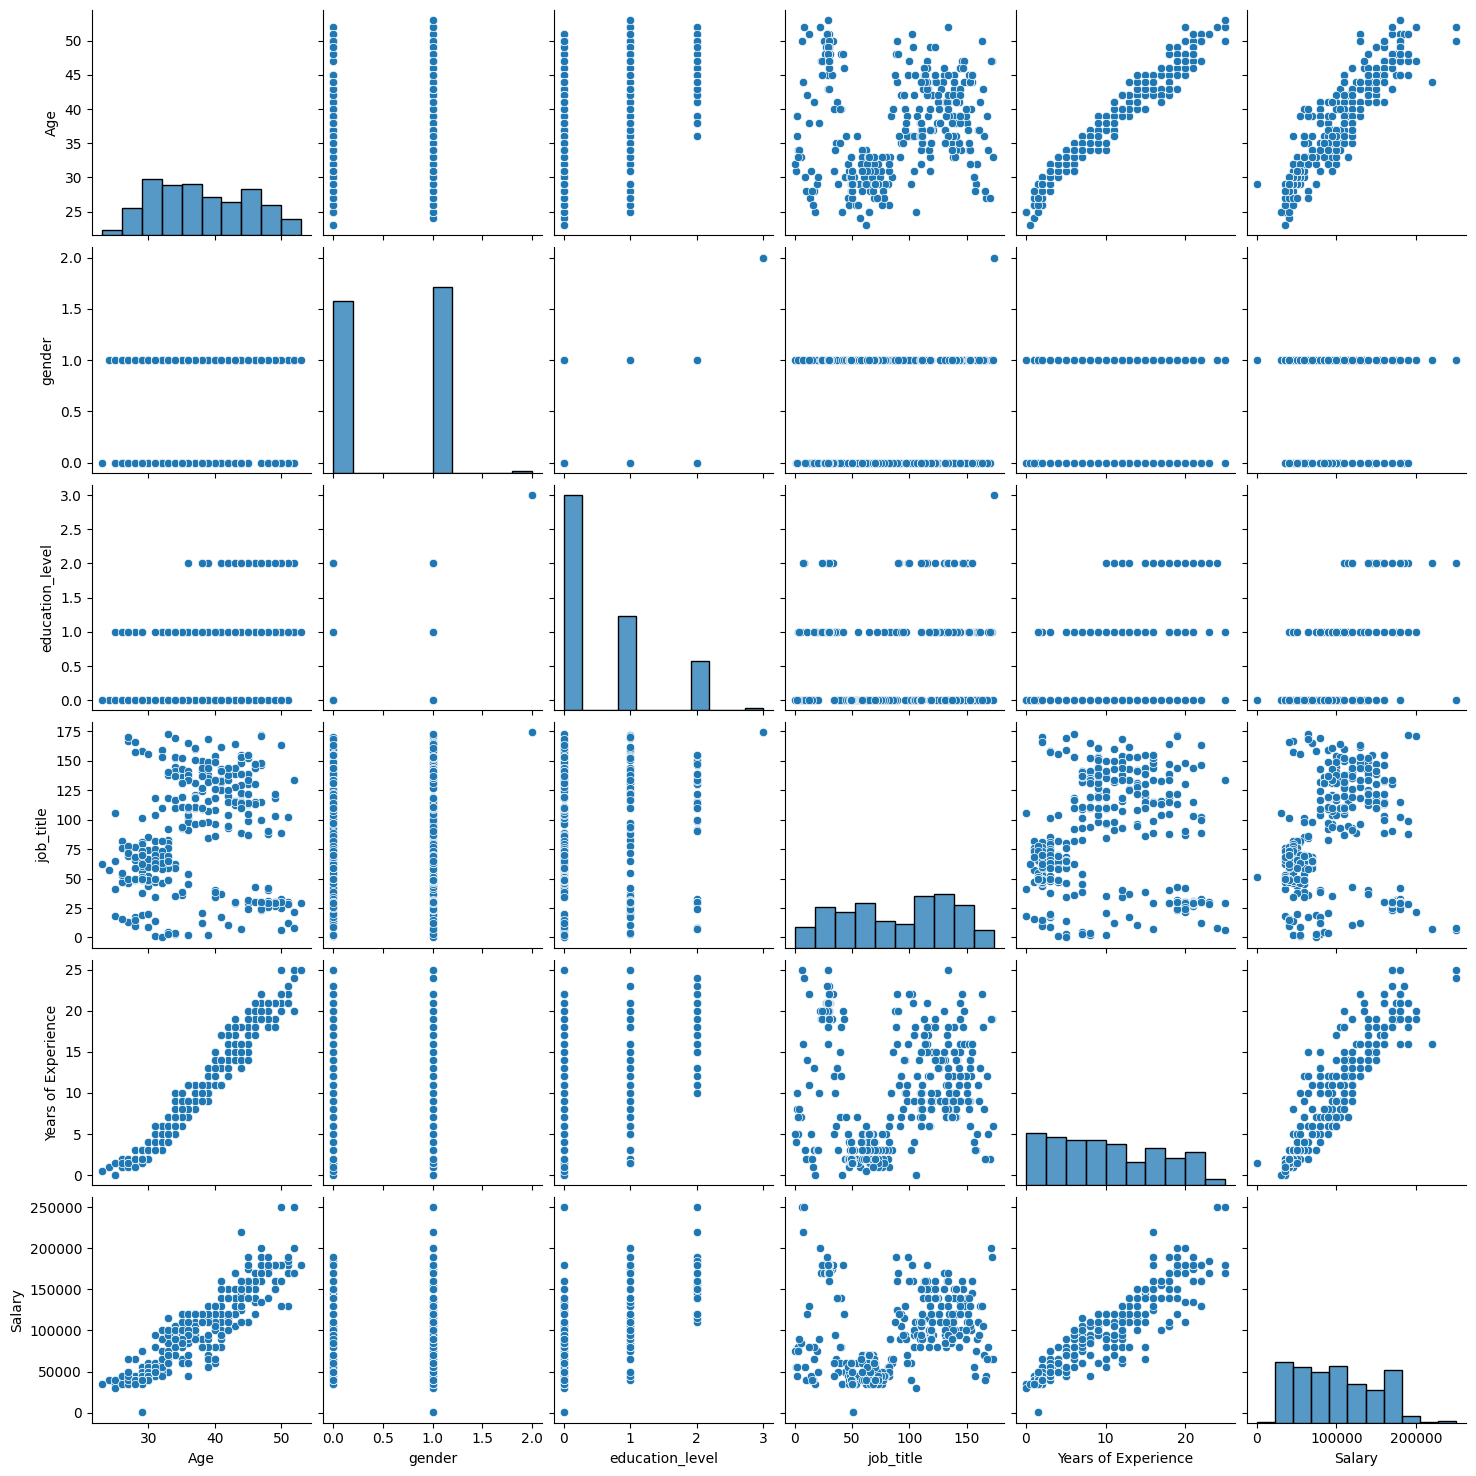

In [35]:
#Pair Plot :
# Pair plot for all variables
sns.pairplot(data)
plt.show()


In [36]:
#Step 3: Preprocessing and Feature Engineering
#1. Handle Outliers
#Detect and handle outliers using the Interquartile Range (IQR) method.

# Detect outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Compare shapes before and after removing outliers
print("Original shape:", data.shape)
print("Cleaned shape:", data_cleaned.shape)

Original shape: (375, 6)
Cleaned shape: (373, 6)


In [37]:
#2. Scale Numerical Features
#Normalize numerical features for consistency.

from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)
scaled_data = pd.DataFrame(scaled_data, columns=data_cleaned.columns)

# Display scaled data
print(scaled_data.head())



        Age    gender  education_level  job_title  Years of Experience  \
0 -0.769398  0.960563        -0.742035   1.486480            -0.768276   
1 -1.336003 -1.041057         0.641860  -1.570634            -1.073702   
2  1.072068  0.960563         2.025754   0.862140             0.758859   
3 -0.202793 -1.041057        -0.742035   0.237800            -0.462849   
4  2.063627  0.960563         0.641860  -1.462989             1.522426   

     Salary  
0 -0.219559  
1 -0.738498  
2  1.025892  
3 -0.842285  
4  2.063768  


In [38]:
#Step 4: Train a Predictive Model
#1. Split Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_cleaned.drop('Salary', axis=1)
y = data_cleaned['Salary']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#2. Train a Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Model Performance:
Mean Squared Error: 249075656.43
R-squared: 0.90


education_level        15062.978273
gender                  7275.180023
Age                     3383.457724
Years of Experience     2182.534156
job_title                 45.923613
dtype: float64


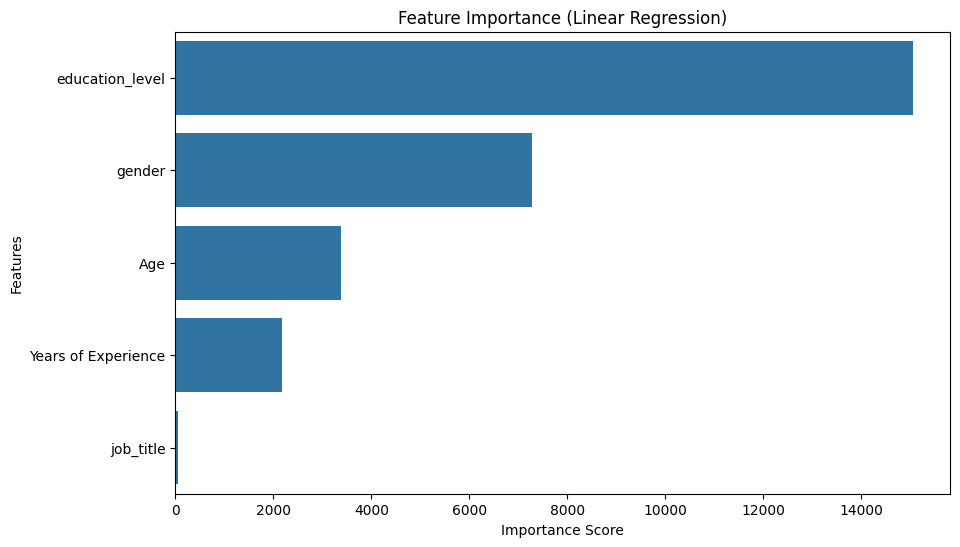

In [40]:
#3. Feature Importance
#Visualize feature importance to understand which factors influence salary the most.

# Extract feature importance
feature_importances = pd.Series(model.coef_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Display feature importance
print(feature_importances)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance (Linear Regression)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [41]:
"""
Step 5: Summary of Insights
Key Findings
Strong Correlations :
YearsExperience has the strongest positive correlation with Salary.
Age shows a moderate positive correlation with Salary.
Categorical Variables :
Higher education levels (e.g., Master's, PhD) tend to result in higher salaries.
Certain job titles (e.g., Data Scientist, Senior Engineer) are associated with higher salaries.
Outliers :
Some employees have unusually high salaries or large years of experience, which may need further investigation.
Recommendations
Focus on YearsExperience, EducationLevel, and JobTitle as key predictors for salary.
Normalize features before training predictive models.
Investigate outliers to understand their impact.
"""

"\nStep 5: Summary of Insights\nKey Findings\nStrong Correlations :\nYearsExperience has the strongest positive correlation with Salary.\nAge shows a moderate positive correlation with Salary.\nCategorical Variables :\nHigher education levels (e.g., Master's, PhD) tend to result in higher salaries.\nCertain job titles (e.g., Data Scientist, Senior Engineer) are associated with higher salaries.\nOutliers :\nSome employees have unusually high salaries or large years of experience, which may need further investigation.\nRecommendations\nFocus on YearsExperience, EducationLevel, and JobTitle as key predictors for salary.\nNormalize features before training predictive models.\nInvestigate outliers to understand their impact.\n"